In [1]:
%cd polymer_growth_simulation/

/home/jordy/Documents/Department Knowledge engineering/Research Project DSDM 2/polymer_growth_simulation


In [2]:
%run ./bayesian-optimization/python/gp.py
%run ./bayesian-optimization/python/plotters.py
from simulation import polymer
from hill_climbing import hill_climbing
from data_processing import minMaxNorm, medianFoldNorm, Comparison
import matplotlib.pyplot as plt
import numpy as np
from sklearn import gaussian_process

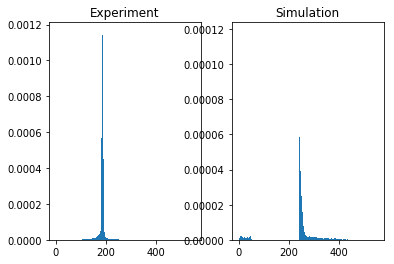

array([1.78096457e-05])

In [3]:
diff = medianFoldNorm('Data/polymer_20k.xlsx', polymer)
X = np.array([1.06200000e+03, 4.68740000e+04, 6.45597730e+07, 2.33000850e-01,
 8.31542953e-05, 5.03979215e-01, 5.94244875e-01, 5.18169312e-01
, 8.16113628e-01, 1.00000000e+00])[None,:]
y = np.array([diff.get_difference(X[0], plot=True)])
y

In [ ]:
kernel = gaussian_process.kernels.RBF(length_scale=2.0, length_scale_bounds=(1, 10.0))
model = gaussian_process.GaussianProcessRegressor(kernel=kernel, copy_X_train=True)
model.get_params()
model.fit(X,y)
model.predict(X)

X = np.vstack((X,[1000, 100000, 31600000, 0.2,
    0.0000806, 0.5, 0.67, 0.67, 1, 1]))
y = np.vstack((y,diff.get_difference(X[1])))

model.fit(X,y)

In [ ]:
X_test = np.array([[9.22312785e+02, 9.90900128e+04, 5.00606276e+06, 2.89285078e-01,
         6.62946796e-01, 4.92841366e-01, 9.90897467e-01, 4.65048165e-01,
         4.94391675e-01, 1.00000000e+00]])
print(model.sample_y(X_test,10))

diff.get_difference(X_test[0])

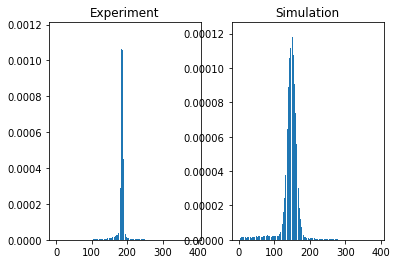

In [ ]:
diff = medianFoldNorm('Data/polymer_20k.xlsx', polymer)
bound = np.array([[900,1100],[90000,110000],[3000000,32000000],
                   [0,1],[0,1],[0,1],[0,1],[0,1],[0,1],[1,1]])
X0 = np.array([[1000, 100000, 31600000, 0.2,
    0.0000806, 0.5, 0.67, 0.67, 1, 1]])
xp,yp = bayesian_optimisation(5,diff.get_difference, bound,
                        X0,alpha=0.1,epsilon=np.finfo(np.float64).eps)

In [8]:
xp,yp

(array([[1.00000000e+03, 1.00000000e+05, 3.16000000e+07, 2.00000000e-01,
         8.06000000e-05, 5.00000000e-01, 6.70000000e-01, 6.70000000e-01,
         1.00000000e+00, 1.00000000e+00],
        [1.09302568e+03, 9.67597545e+04, 7.67149257e+06, 7.42470426e-01,
         3.24926519e-01, 7.35657910e-01, 5.78826302e-01, 4.98097579e-02,
         3.09175713e-01, 1.00000000e+00],
        [9.41532690e+02, 9.65668759e+04, 5.61964831e+06, 2.14731920e-01,
         5.70702070e-01, 8.72566354e-01, 2.40370494e-01, 1.14579237e-01,
         5.89764648e-01, 1.00000000e+00],
        [1.01288052e+03, 1.03591114e+05, 1.63412607e+07, 1.82709164e-01,
         7.17550950e-01, 7.93980082e-01, 6.68645052e-01, 2.44236783e-01,
         2.48343186e-01, 1.00000000e+00],
        [1.06567514e+03, 9.32699386e+04, 1.84333409e+07, 4.22127938e-02,
         2.81718826e-01, 5.47234099e-01, 3.08173181e-02, 2.85427672e-01,
         8.87174012e-01, 1.00000000e+00],
        [1.06281804e+03, 9.44719415e+04, 3.17981626e+07, 5.3

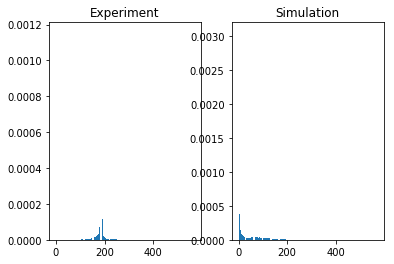

2.0539160373599245e-05

In [10]:
diff = medianFoldNorm('Data/polymer_20k.xlsx', polymer)
diff.get_difference([1.01288052e+03, 1.03591114e+05, 1.63412607e+07, 1.82709164e-01,
         7.17550950e-01, 7.93980082e-01, 6.68645052e-01, 2.44236783e-01,
         2.48343186e-01, 1.00000000e+00],plot=True)